In [75]:
import pandas as pd
import numpy as np


In [3]:
df_plns = pd.read_csv("C:/Users/miles.MILE-BL-4766-LA.000/Documents/FT/airline_data/planes.csv")

In [4]:
df_plns

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...
3317,N997AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3318,N997DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,NaN,Turbo-fan
3319,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3320,N998DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,NaN,Turbo-jet


In [10]:
# planes_data = DataFrame()
aircraft_data = df_plns[['tailnum','manufacturer','model','seats']]

In [11]:
aircraft_data.rename(columns={'tailnum':'aircraft_id'})

,aircraft_id,manufacturer,model,seats
0,N10156,EMBRAER,EMB-145XR,55
1,N102UW,AIRBUS INDUSTRIE,A320-214,182
2,N103US,AIRBUS INDUSTRIE,A320-214,182
3,N104UW,AIRBUS INDUSTRIE,A320-214,182
4,N10575,EMBRAER,EMB-145LR,55
...,...,...,...,...
3317,N997AT,BOEING,717-200,100
3318,N997DL,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,142
3319,N998AT,BOEING,717-200,100
3320,N998DL,MCDONNELL DOUGLAS CORPORATION,MD-88,142


In [29]:
len(aircraft_data['manufacturer'].unique())

35

In [37]:
manf_data = pd.DataFrame()
manf_data['manufacturer'] = aircraft_data['manufacturer'].unique()
manf_data.head()

,manufacturer
0,EMBRAER
1,AIRBUS INDUSTRIE
2,BOEING
3,AIRBUS
4,BOMBARDIER INC


In [82]:
# manfacturer data 

In [38]:
manf_data['mft_id'] = ['M'+ str(i) for i in range(1,36)]
manf_data.head()

,manufacturer,mft_id
0,EMBRAER,M1
1,AIRBUS INDUSTRIE,M2
2,BOEING,M3
3,AIRBUS,M4
4,BOMBARDIER INC,M5


In [55]:
# manf_data.join(aircraft_data,on='manufacturer')
# pd.concat([aircraft_data,manf_data],axis=1,join='inner')
ac_data = aircraft_data.set_index('manufacturer').join(manf_data.set_index('manufacturer'),how='inner')

In [56]:
ac_data.columns

Index(['tailnum', 'model', 'seats', 'mft_id'], dtype='object')

In [62]:
ac_data = ac_data[['model','seats','mft_id']].reset_index()

In [63]:
ac_data = ac_data[['model','seats','mft_id']]
ac_data

,model,seats,mft_id
0,A109E,8,M11
1,A320-214,182,M4
2,A320-214,182,M4
3,A320-214,182,M4
4,A320-214,182,M4
...,...,...,...
3317,PA-32R-300,7,M10
3318,R66,5,M26
3319,S-76A,14,M9
3320,FALCON XP,2,M17


In [67]:
ac_data_u = ac_data.drop_duplicates()

In [68]:
ac_data_u['aircraft_id'] = ['A'+ str(i) for i in range(1,148)]
ac_data_u.head()

C:\Users\miles.MILE-BL-4766-LA.000\AppData\Local\Temp\ipykernel_23268\609967193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ac_data_u['aircraft_id'] = ['A'+ str(i) for i in range(1,148)]


,model,seats,mft_id,aircraft_id
0,A109E,8,M11,A1
1,A320-214,182,M4,A2
5,A321-211,199,M4,A3
37,A319-114,145,M4,A4
69,A320-212,182,M4,A5


In [69]:
ac_data_u

,model,seats,mft_id,aircraft_id
0,A109E,8,M11,A1
1,A320-214,182,M4,A2
5,A321-211,199,M4,A3
37,A319-114,145,M4,A4
69,A320-212,182,M4,A5
...,...,...,...,...
3317,PA-32R-300,7,M10,A143
3318,R66,5,M26,A144
3319,S-76A,14,M9,A145
3320,FALCON XP,2,M17,A146


In [246]:
# ac_data_p   aircraft data with required no of seats


ac_data_p = ac_data_u[(ac_data_u['seats'] > 120)]

ac_data_p

,model,seats,mft_id,aircraft_id
1,A320-214,182,M4,A2
5,A321-211,199,M4,A3
37,A319-114,145,M4,A4
69,A320-212,182,M4,A5
71,A320-211,182,M4,A6
...,...,...,...,...
3077,DC-9-83(MD-83),172,M19,A134
3156,DC-9-51,139,M19,A135
3164,MD-90-30,142,M19,A136
3195,MD-88,142,M34,A137


In [247]:
aircraft_500 = ac_data_p.sample(500,replace=True)
aircraft_500

,model,seats,mft_id,aircraft_id
938,767-201,255,M3,A47
3077,DC-9-83(MD-83),172,M19,A134
2283,757-2B7,178,M3,A101
1088,737-3K2,149,M3,A57
1088,737-3K2,149,M3,A57
...,...,...,...,...
3298,MD-88,142,M33,A138
316,A319-131,179,M4,A14
814,737-76N,149,M3,A43
295,A319-132,179,M4,A13


In [248]:
aircraft_500.seats.sum()

105602

In [249]:
aircraft_500['aircraft_id'] = ['A'+ str(i) for i in range(1,501)]

In [83]:
# travel_calss 
travel_calss = pd.DataFrame({'travelclass_id':[1,2],'name':["Business","Economy"],
                             'description':["Business class is indented for corporate travelers. The difference between first class and economy usually lies in service, seats and food.",
                                            "Economy class is another term for the airplane’s main cabin, as opposed to premium cabins like business class and first class."]})

In [84]:
travel_calss

,travelclass_id,name,description
0,1,Business,Business class is indented for corporate trave...
1,2,Economy,Economy class is another term for the airplane...


In [87]:
2500*150

375000

In [305]:
aircraft_500['seats'].sum()

105602

In [327]:
# aircraft seats
dict_seats = {'aircraft_id':'','seat_id':'','travelclass_id':''}
row_count = 0
a_id =[]
sid = []
tcl = []
for aid, sts in zip(aircraft_500['aircraft_id'],aircraft_500['seats']):
    a_id.extend([aid]*sts)

    for seat in range(1,int(sts*0.2)):
        sid.append(f'S{seat}')
        tcl.append("B")

    for seat in range(int(sts*0.2),sts+1):
        sid.append(f'S{seat}')
        tcl.append("E")
    


In [328]:
len(a_id),len(sid),len(tcl)

(105602, 105602, 105602)

In [332]:
aircraft_seats = pd.DataFrame.from_dict({'aircraft_id':a_id, 'seat_id':sid, 'travelclass_id':tcl})

In [333]:
aircraft_seats

,aircraft_id,seat_id,travelclass_id
0,A1,S1,B
1,A1,S2,B
2,A1,S3,B
3,A1,S4,B
4,A1,S5,B
...,...,...,...
105597,A500,S145,E
105598,A500,S146,E
105599,A500,S147,E
105600,A500,S148,E


In [98]:
flights = pd.read_csv("C:/Users/miles.MILE-BL-4766-LA.000/Documents/FT/airline_data/flights.csv")
flights.head()

C:\Users\miles.MILE-BL-4766-LA.000\AppData\Local\Temp\ipykernel_23268\3461807969.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv("C:/Users/miles.MILE-BL-4766-LA.000/Documents/FT/airline_data/flights.csv")


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
# directions table
directions = flights[flights['YEAR']==2015][['ORIGIN_AIRPORT','DESTINATION_AIRPORT','DISTANCE']]

In [101]:
directions.head()

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DISTANCE
0,ANC,SEA,1448
1,LAX,PBI,2330
2,SFO,CLT,2296
3,LAX,MIA,2342
4,SEA,ANC,1448


In [109]:
# len(directions['ORIGIN_AIRPORT'].unique())
# directions[['DESTINATION_AIRPORT','ORIGIN_AIRPORT']]
directions = directions.rename(columns={'DESTINATION_AIRPORT':'dest_airport','ORIGIN_AIRPORT':'org_airport','DISTANCE':'dist'})

In [110]:
directions = directions.drop_duplicates()
directions.shape

(12445, 3)

In [144]:
# directions 

temp_dir = directions[(directions.apply(lambda x: len(str(x.dest_airport)) == 3, axis=1))] 
#             and 
#             directions.apply(lambda x: len(str(x.org_airport)) == 3, axis=1))]

In [186]:
temp_dir.to_csv('directions.csv')

In [149]:

# airports
airports = pd.read_csv("C:/Users/miles.MILE-BL-4766-LA.000/Documents/FT/airline_data/airports.csv")
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [164]:
states = pd.read_csv("C:/Users/miles.MILE-BL-4766-LA.000/Documents/FT/airline_data/USA_states_refined.csv")
states

,Unnamed: 0,iata_country_code,name
0,0,AK,Alaska
1,1,AL,Alabama
2,2,AR,Arkansas
3,3,AZ,Arizona
4,4,CA,California
5,5,CO,Colorado
6,6,CT,Connecticut
7,7,DC,District of Columbia
8,8,DE,Delaware
9,9,FL,Florida


In [154]:
airports.shape

(322, 7)

In [153]:
len(airports['STATE'].unique())

54

In [160]:
sts_l = list(airports['STATE'].unique())

In [162]:
sts_l.sort()

In [163]:
sts_l

['AK',
 'AL',
 'AR',
 'AS',
 'AZ',
 'CA',
 'CO',
 'CT',
 'DE',
 'FL',
 'GA',
 'GU',
 'HI',
 'IA',
 'ID',
 'IL',
 'IN',
 'KS',
 'KY',
 'LA',
 'MA',
 'MD',
 'ME',
 'MI',
 'MN',
 'MO',
 'MS',
 'MT',
 'NC',
 'ND',
 'NE',
 'NH',
 'NJ',
 'NM',
 'NV',
 'NY',
 'OH',
 'OK',
 'OR',
 'PA',
 'PR',
 'RI',
 'SC',
 'SD',
 'TN',
 'TX',
 'UT',
 'VA',
 'VI',
 'VT',
 'WA',
 'WI',
 'WV',
 'WY']

In [180]:
ss = list(states['iata_country_code'])
ss.sort()

In [183]:
len(ss),len(sts_l)

(51, 54)

In [199]:
# airports
airports_1 = airports[airports.apply(lambda x:x['STATE'] in ss, axis = 1)]
airports_1.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [200]:
len(airports_1['STATE'].unique())

50

In [201]:
airports_1.shape

(315, 7)

In [202]:
airports.shape

(322, 7)

In [415]:
temp_dir_2 = directions[(directions.apply(lambda x: x.dest_airport in list(airports_1['IATA_CODE']), axis=1))] 
temp_dir_2.shape

(4713, 3)

In [218]:
temp_dir.shape

(4761, 3)

<AxesSubplot:>

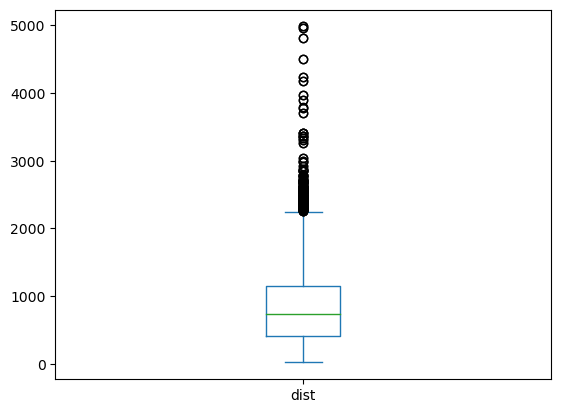

In [340]:
temp_dir_2[['dist']].plot(kind='box')


In [345]:
temp_dir_2['dist'].min(),temp_dir_2['dist'].max(),temp_dir_2['dist'].mean()

(21, 4983, 898.0632293655846)

In [343]:
temp_dir_2[temp_dir_2['dist'] == 4983]

,org_airport,dest_airport,dist
2253,JFK,HNL,4983
9394,HNL,JFK,4983


In [349]:
airports['LATITUDE']  airports['LONGITUDE']

,LATITUDE,LONGITUDE
0,40.65236,-75.44040
1,32.41132,-99.68190
2,35.04022,-106.60919
3,45.44906,-98.42183
4,31.53552,-84.19447
...,...,...
317,56.48433,-132.36982
318,44.68840,-111.11764
319,36.28187,-94.30681
320,59.50336,-139.66023


In [367]:
row = airports_1[airports_1['IATA_CODE']=='IAH']
(row['LATITUDE'] - row['LONGITUDE'])**2

151    15705.150022
dtype: float64

In [372]:
int(row['LATITUDE'])

29

In [385]:
dist_list = []
org=[]
dest=[]

non_sync_rows = 0

for i in temp_dir_2.values:
    row1 = airports_1[airports_1['IATA_CODE']==i[0]]
    row2 = airports_1[airports_1['IATA_CODE']==i[1]]
    
    try:
        lg1 = int(row1['LONGITUDE'])
        lt1 = int(row1['LATITUDE'])
        lg2 = int(row2['LONGITUDE'])
        lt2 = int(row2['LATITUDE'])
        
        dist = ( (lg1-lg2)**2 + (lt1-lt2)**2 )**(0.5)
        if dist != 0:
            dist_list.append(dist)
            org.append(i[0])
            dest.append(i[1])
    except:
        non_sync_rows += 1
#     print(dist)

In [386]:
len(dist_list),max(dist_list),min(dist_list)

(4645, 86.12200647918046, 1.0)

In [400]:
new_dist = []
for i in dist_list:
    if i < 3:
        new_dist.append(i*3)
    elif i < 10:
        new_dist.append(i*2)
    elif i <20 :
        new_dist.append(i*1.6)
    elif i < 50 :
        new_dist.append(i*1.2)
    else:
        new_dist.append(i*.9)
# new_dist

[36.49657518178932,
 46.367229807267975,
 50.45711049990873,
 46.59957081347424,
 36.49657518178932,
 35.799441336423115,
 28.0912797857271,
 45.66311421705707,
 30.594117081556707,
 37.37378760575385,
 25.05673562138532,
 44.025447186825936,
 32.77560068099439,
 33.47118163435525,
 34.9857113690718,
 33.79230681678894,
 37.66165158354052,
 34.82068350851258,
 25.45584412271571,
 56.895694037422544,
 29.50254226333724,
 28.014282071829005,
 36.27891949879434,
 26.64432397340942,
 42.017139360027834,
 33.34186557467953,
 31.49857139617605,
 39.58181400592954,
 25.42754412050051,
 53.51784749034662,
 55.68051723897687,
 24.053274205396654,
 27.387588429797905,
 38.47492690051536,
 31.49857139617605,
 10.0,
 8.485281374238571,
 11.661903789690601,
 6.708203932499369,
 4.242640687119286,
 23.075528162969533,
 6.324555320336759,
 18.24280680158621,
 6.324555320336759,
 10.198039027185569,
 14.560219778561036,
 27.527440854536408,
 29.415642097360376,
 30.77661449867415,
 24.422940035957996,

In [406]:
min(new_dist)*50,max(new_dist)*50,sum(new_dist)/len(new_dist)*50

(150.0, 3875.4902915631205, 1111.6380452008905)

In [410]:
min(new_dist)*5*80,max(new_dist)*5*80,sum(new_dist)/len(new_dist)*5*80

(1200.0, 31003.92233250496, 8893.104361607124)

In [387]:
import matplotlib.pyplot as plt

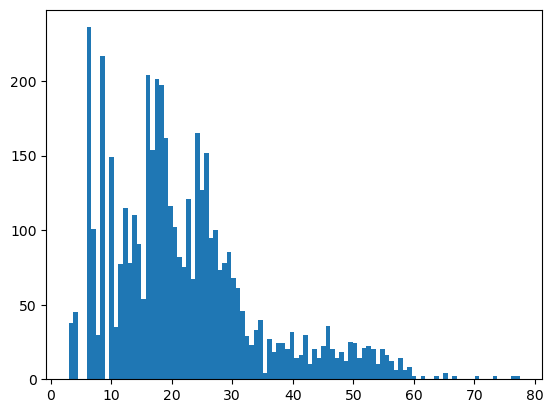

In [401]:
plt.hist(new_dist,bins=100)
plt.show()

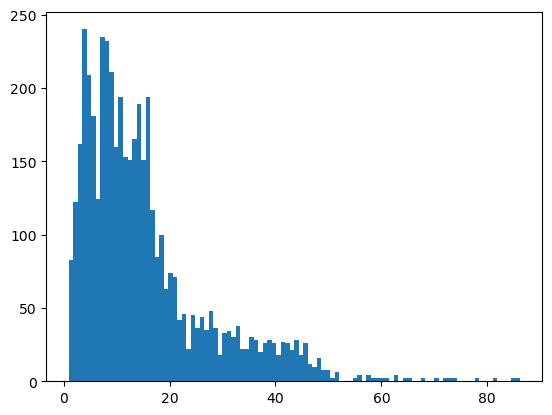

In [391]:
plt.hist(dist_list,bins=100)
plt.show()

In [412]:
dir_tbl = pd.DataFrame.from_dict({'org_airport':org, 'dest_airport':dest, 'distance':new_dist})

In [413]:
dir_tbl.shape

(4645, 3)

In [421]:
4645/312

14.887820512820513

In [ ]:
# Schedule

# directions   4645
# dates        45 days schedule



In [427]:
(dir_tbl['org_airport'].value_counts() == 1).sum()

66

In [429]:
flights.shape

(5819079, 31)

In [ ]:
flights[flights['YEAR']==2015 and flights['MONTH'] in [1,2] and fli]

In [435]:
flights[(flights['MONTH']==1)][['YEAR','MONTH','DAY','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_TIME','ARRIVAL_TIME']]

469968

In [434]:
flights['YEAR'].unique()

array([2015], dtype=int64)

In [430]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [221]:
airports_1.to_csv("C:/Users/miles.MILE-BL-4766-LA.000/Documents/FT/airline_data/tbl_airports.csv")

In [222]:
temp_dir_2.to_csv("C:/Users/miles.MILE-BL-4766-LA.000/Documents/FT/airline_data/tbl_directions.csv")

In [223]:
travel_calss.to_csv("C:/Users/miles.MILE-BL-4766-LA.000/Documents/FT/airline_data/tbl_travel_class.csv")

In [225]:
manf_data.to_csv("C:/Users/miles.MILE-BL-4766-LA.000/Documents/FT/airline_data/tbl_mft_data.csv")

In [255]:
aircraft_500.to_csv("C:/Users/miles.MILE-BL-4766-LA.000/Documents/FT/airline_data/tbl_aircraft.csv")

In [334]:
aircraft_seats.to_csv("C:/Users/miles.MILE-BL-4766-LA.000/Documents/FT/airline_data/tbl_aircraft_seats.csv")

In [414]:
dir_tbl.to_csv("C:/Users/miles.MILE-BL-4766-LA.000/Documents/FT/airline_data/tbl_directions_new.csv")